In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
from tqdm import tqdm

import numpy as np

sys.path.append("..")
import dm21cm.physics as phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file("../matplotlibrc")

## 1. Global quantities

In [7]:
l = os.listdir(os.environ['P21C_CACHE_DIR'])
l.sort()
[print(i) for i in l];

phph_dhinit_s8zero
phph_dhinit_s8zero_fine
phph_dhinit_s8zero_fine_DEBUG
phph_dhinit_s8zero_fine_DEBUG_230629
phph_dhinit_s8zero_fine_debug


In [ ]:
! ls -l ../data/run_info/DH

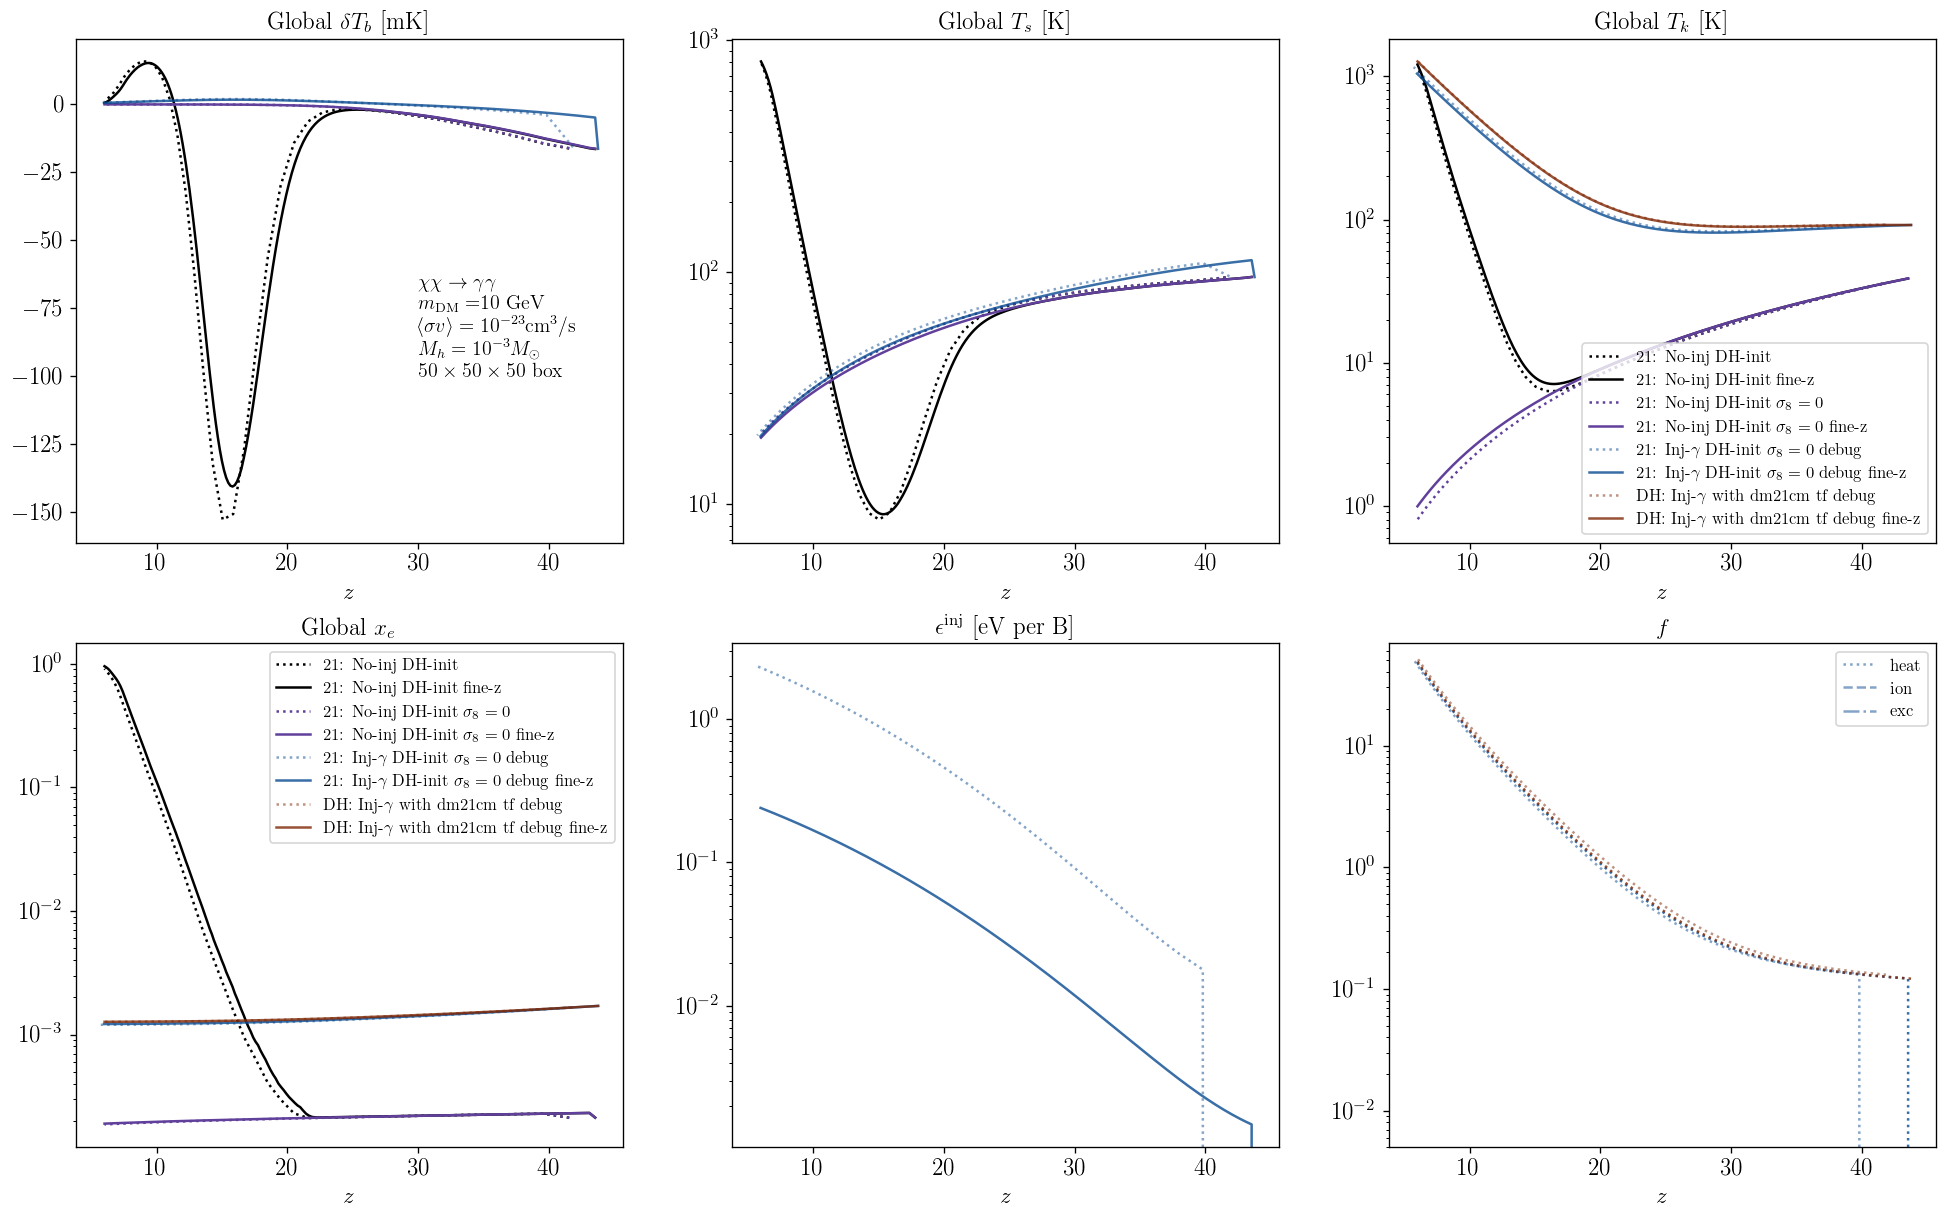

In [8]:
plot_options = {
    'base_dhinit' : dict(color='black', ls=':'),
    'base_zfine' : dict(color='black', ls='-'),
    'compdh_base_dhinit' : dict(color=cms['Purples'](0.8), ls=':'),
    'compdh_base_finestep' : dict(color=cms['Purples'](0.8), ls='-'),
    #'phph_dhinit' : dict(color=cms['Blues'](0.5), ls=':'),
    #'phph_dhinit_fine' : dict(color=cms['Blues'](0.5), ls='-'),
    #'phph_dhinit_s8zero' : dict(color=cms['Blues'](0.9), ls=':'),
    #'phph_dhinit_s8zero_fine' : dict(color=cms['Blues'](0.9), ls='-'),
    'phph_dhinit_s8zero_fine_debug' : dict(color=cms['Blues'](0.9), alpha=0.5, ls=':'),
    'phph_dhinit_s8zero_fine_debug_fine' : dict(color=cms['Blues'](0.9), alpha=0.8, ls='-'),
    
    #'DH/base' : dict(color=cms['Reds'](0.8), alpha=0.5),
    #'DH/base_caseA_in_reion' : dict(color=cms['Reds'](0.8), ls='--'),
    #'DH/phph' : dict(color=cms['Oranges'](0.5), alpha=0.5),
    #'DH/phph_caseA_in_reion' : dict(color=cms['Oranges'](0.5), ls='--'),
    'DH/phph_debug' : dict(color=cms['Oranges'](1.0), alpha=0.5, ls=':'),
    'DH/phph_debug_fine' : dict(color=cms['Oranges'](1.0), alpha=0.8, ls='-'),
}
labels = {
    'T_b' : {
    },
    'T_s' : {
    },
    'T_k' : {
        'base_dhinit' : r'21: No-inj DH-init',
        'base_zfine' : '21: No-inj DH-init fine-z',
        'compdh_base_dhinit' : r'21: No-inj DH-init $\sigma_8=0$',
        'compdh_base_finestep' : r'21: No-inj DH-init $\sigma_8=0$ fine-z',
        'phph_dhinit' : r'21: Inj-$\gamma$ DH-init',
        'phph_dhinit_fine' : r'21: Inj-$\gamma$ DH-init fine-z',
        'phph_dhinit_s8zero' : r'21: Inj-$\gamma$ DH-init $\sigma_8=0$',
        'phph_dhinit_s8zero_fine' : r'21: Inj-$\gamma$ DH-init $\sigma_8=0$ fine-z',
        'phph_dhinit_s8zero_fine_debug' : '21: Inj-$\gamma$ DH-init $\sigma_8=0$ debug',
        'phph_dhinit_s8zero_fine_debug_fine' : '21: Inj-$\gamma$ DH-init $\sigma_8=0$ debug fine-z',
        
        'DH/base' : r'DH: No-inj',
        'DH/base_caseA_in_reion' : 'DH: No-inj case-A-from-rs=44',
        'DH/base_recfast' : r'RECFAST:',
        'DH/phph' : r'DH: Inj-$\gamma$',
        'DH/phph_caseA_in_reion' : r'DH: Inj-$\gamma$ case-A-from-rs=44',
        'DH/phph_debug' : 'DH: Inj-$\gamma$ with dm21cm tf debug',
        'DH/phph_debug_fine' : 'DH: Inj-$\gamma$ with dm21cm tf debug fine-z',
        
        'xray_bath_test' : r'$\gamma$ bath, $T_k$, $x_e$ DH init. New TF. Xray bath test.',
        'xray_test' : r'Xray!!',
    },
    'f' : {
        'phph_dhinit_s8zero_fine_debug' : 'yes',
    }
}
labels['x_e'] = labels['T_k']

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for name in plot_options.keys():
    
    records = np.load(f'../data/run_info/{name}_records.npy', allow_pickle=True).item()
    
    if 'DH' not in name:
        axs[0,0].plot(records['z'], records['T_b'],
                      label=(labels['T_b'][name] if name in labels['T_b'].keys() else None), **plot_options[name])
        axs[0,1].plot(records['z'], records['T_s'],
                      label=(labels['T_s'][name] if name in labels['T_s'].keys() else None), **plot_options[name])
    axs[0,2].plot(records['z'], records['T_k'],
                  label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])
    axs[1,0].plot(records['z'], records['x_e'],
                  label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])
    
    if ('base' not in name) and ('DH' not in name):
        axs[1,1].plot(records['z'], records['dE_inj_per_B'], **plot_options[name])
        
    if 'base' not in name:
        plot_options[name].update(ls=':')
        axs[1,2].plot(records['z'], records['f_heat'],
                      label=('heat' if name in labels['f'].keys() else None), **plot_options[name])
        plot_options[name].update(ls='--')
        axs[1,2].plot(records['z'], records['f_ion'],
                      label=('ion' if name in labels['f'].keys() else None), **plot_options[name])
        plot_options[name].update(ls='-.')
        axs[1,2].plot(records['z'], records['f_exc'],
                      label=('exc' if name in labels['f'].keys() else None), **plot_options[name])

axs[0,0].set(title=r'Global $\delta T_b$ [mK]', xlabel=r'$z$')
axs[0,1].set(title=r'Global $T_s$ [K]', xlabel=r'$z$')
axs[0,2].set(title=r'Global $T_k$ [K]', xlabel=r'$z$')
axs[1,0].set(title=r'Global $x_e$', xlabel=r'$z$')
axs[1,1].set(title=r'$\epsilon^\mathrm{inj}$ [eV per B]', xlabel=r'$z$')
axs[1,2].set(title=r'$f$', xlabel=r'$z$')

axs[0,1].set(yscale='log')
axs[0,2].set(yscale='log')
axs[1,0].set(yscale='log')
axs[1,1].set(yscale='log')
axs[1,2].set(yscale='log')
axs[1,2].set(ylim=(5e-3, None))

textstr = r'$\chi\chi\rightarrow\gamma\gamma$' + '\n' + \
          r'$m_\mathrm{DM}=$10~GeV' + '\n' + \
          r'$\langle\sigma v\rangle=10^{-23}\mathrm{cm}^3/\mathrm{s}$' + '\n' + \
          r'$M_h=10^{-3}M_\odot$' + '\n' + \
          r'$50\times50\times50$ box'

axs[0,0].text(30, -100, textstr, fontsize=12)
#axs[0,0].legend(fontsize=10)
#axs[0,1].legend(fontsize=10)
axs[0,2].legend(fontsize=10)
axs[1,0].legend(fontsize=10)
axs[1,2].legend(fontsize=10)
fig.savefig('../outputs/plots/global_evolution.pdf')

### 1.1 get ranges

In [ ]:
# range
fig, axs = plt.subplots(1, 4, figsize=(20,4))
for i, k in enumerate(['T_b', 'T_s', 'T_k', 'x_e']):
    for rn in run_names:
        d = [sd[k] for sd in slice_datas[rn]]
        axs[i].hist(np.array(d).ravel(), bins=30)
    axs[i].set(title=k)

## 2. Power spectra

In [2]:
import pickle

In [3]:
ps1 = pickle.load(open(f'../data/run_info/phph_dhinitPhTkX_new_ps', 'rb'))
ps0 = pickle.load(open(f'../data/run_info/base_ps', 'rb'))

In [13]:
def get_z_arr(z_start=None, z_end=20):
    
    if z_start is None:
        z_start = 44
    z_arr = [z_end]
    while np.max(z_arr) < z_start:
        z_prev = (1 + np.max(z_arr)) * 1.05 - 1
        z_arr.append(z_prev)
    return np.array(z_arr[::-1][1:])

In [23]:
z_arr = np.geomspace(6, 44, 20)

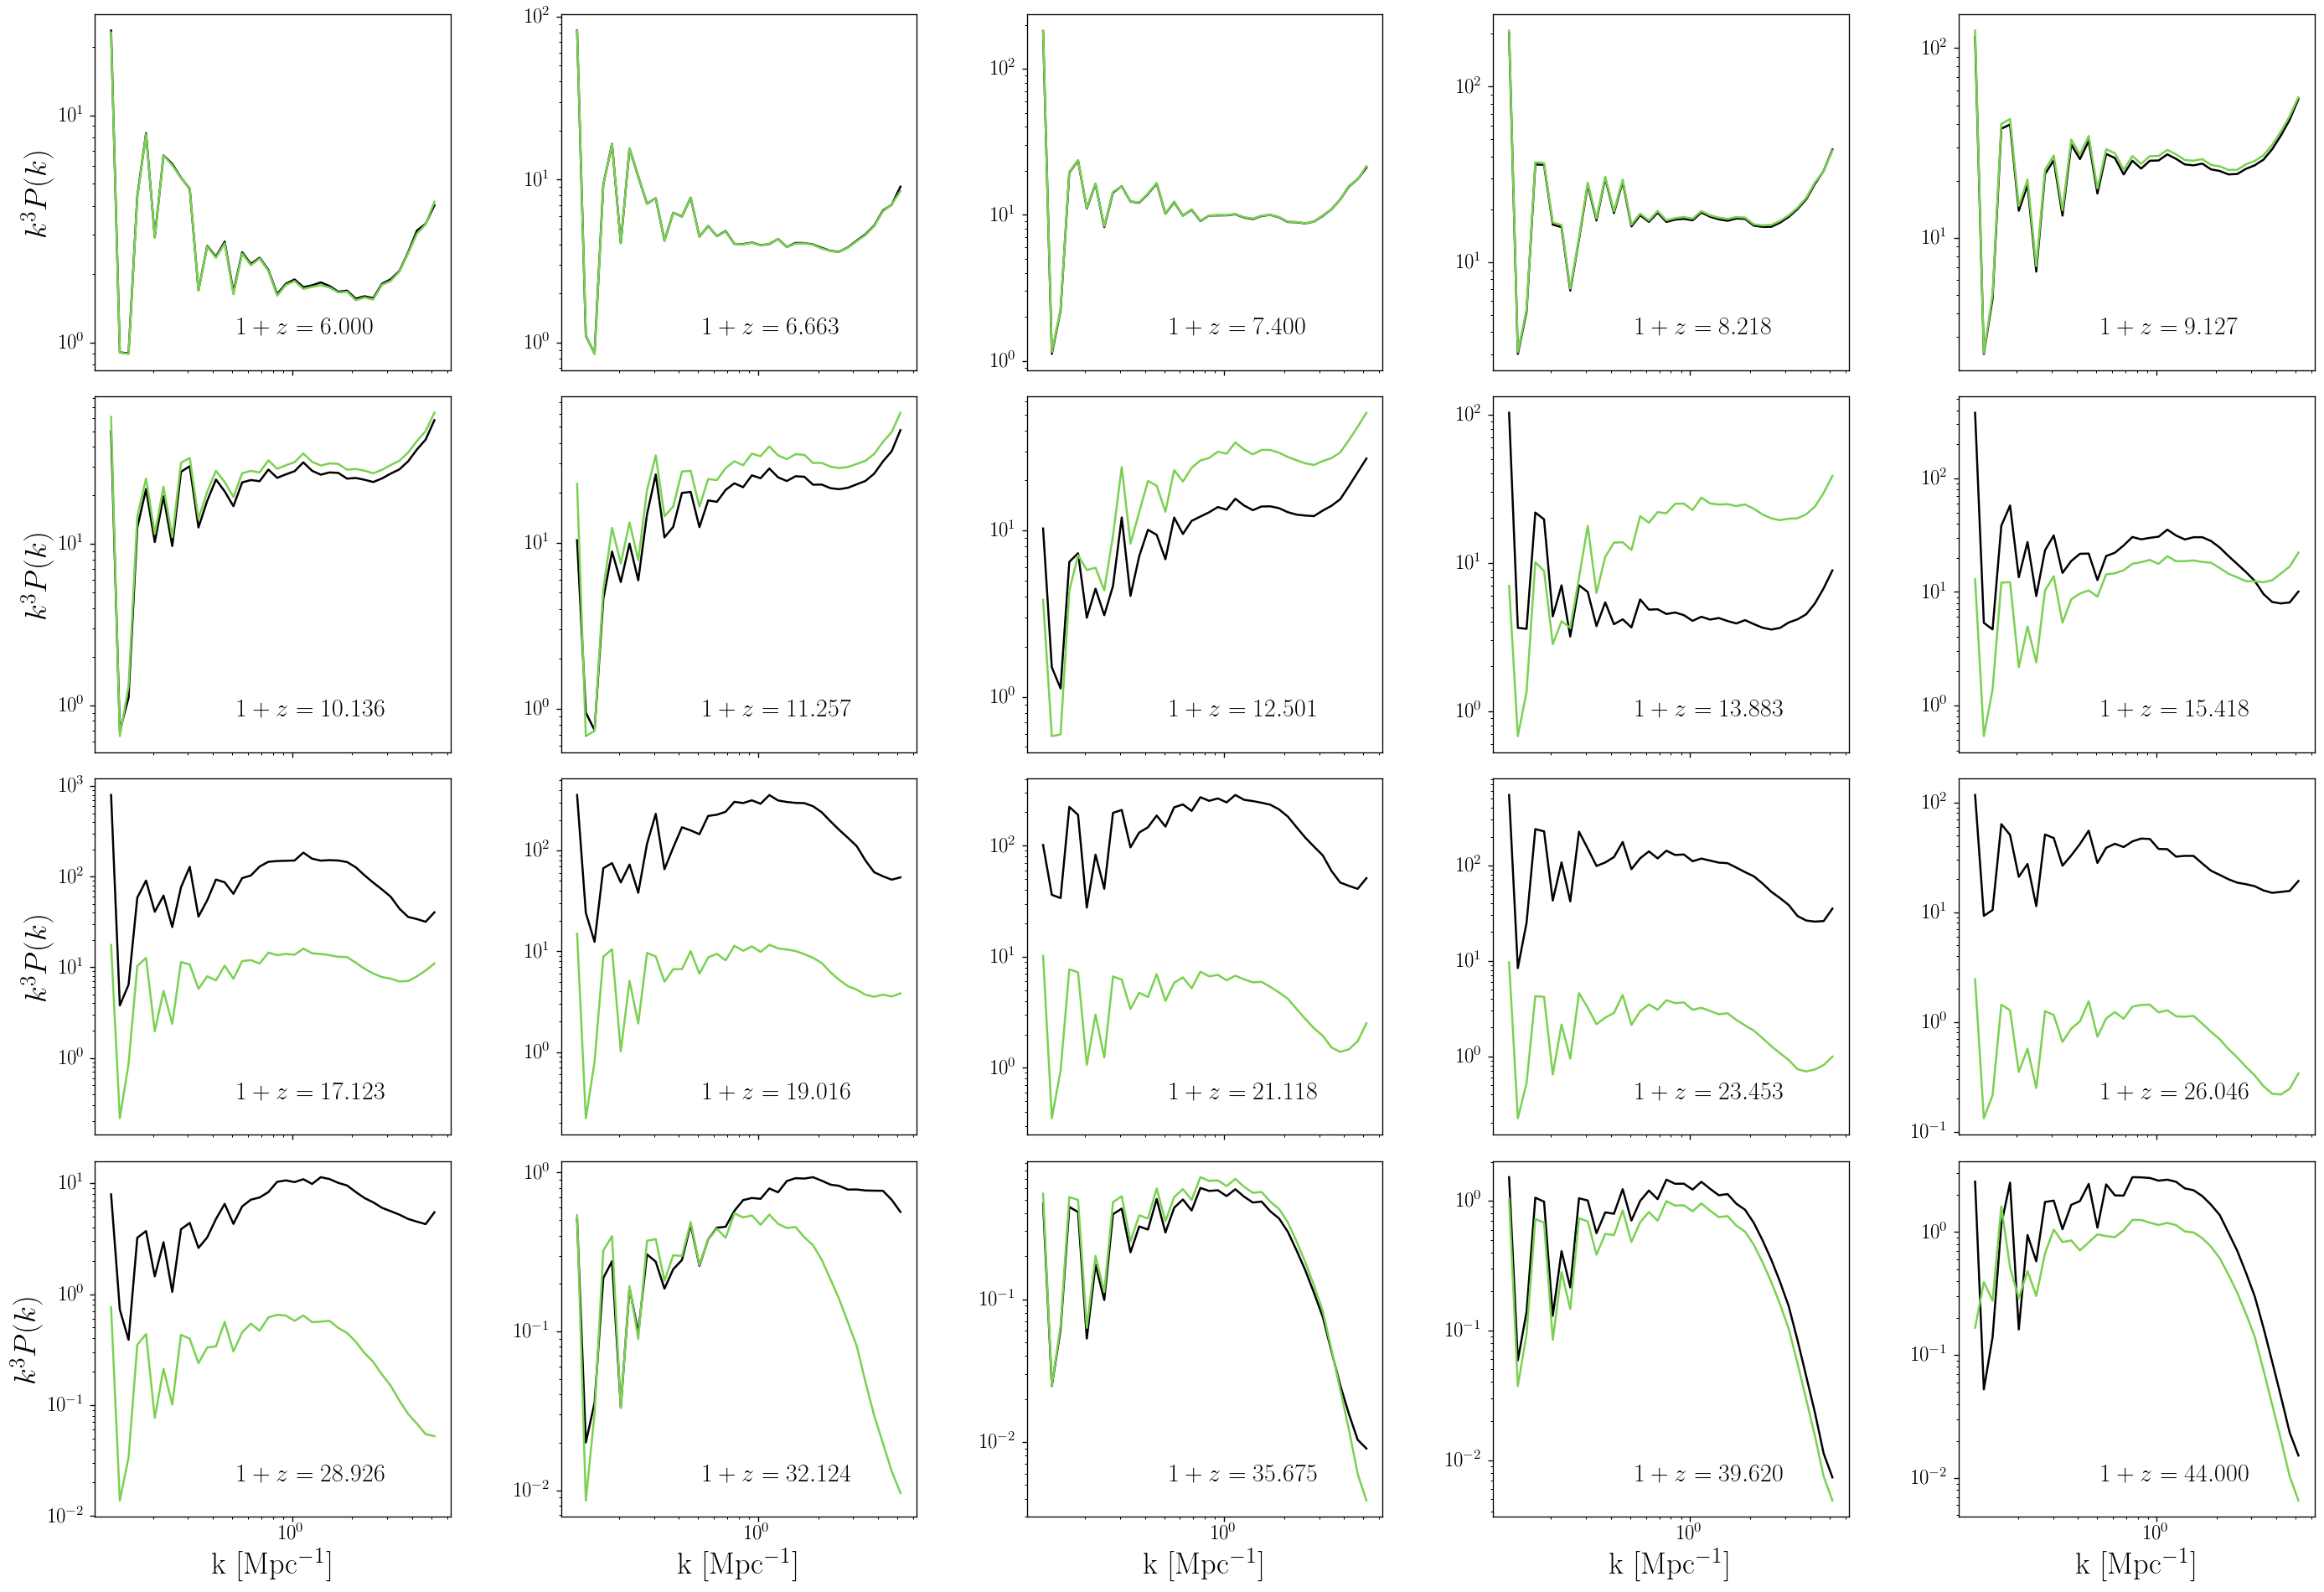

In [24]:
fig, axs = plt.subplots(ncols = 5, nrows = 4, figsize = (24, 16))

for i in range(len(ps0)):
    row_index, col_index = np.unravel_index(i, axs.shape)
    
    ax = axs[row_index, col_index]
    ax.plot(ps0[i]['k'], ps0[i]['delta'], color = 'black')
    ax.plot(ps1[i]['k'], ps1[i]['delta'], color = mpl.cm.get_cmap('viridis')(0.8))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(.4, .1, f'$1+z={z_arr[i]:.3f}$', transform=ax.transAxes, fontsize=18)
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.set(aspect=np.log(xlim[1]/xlim[0])/np.log(ylim[1]/ylim[0]))
    
for i in range(axs.shape[0]-1):
    for j in range(axs.shape[1]):
        axs[i, j].set_xticklabels([])

for j in range(axs.shape[1]):
    axs[-1, j].set_xlabel('k [Mpc$^{-1}$]', fontsize = 22)
for i in range(axs.shape[0]):
    axs[i, 0].set_ylabel('$k^3 P(k)$', fontsize = 22)
    
plt.tight_layout()
plt.show()

## 3. Make evolution gif

In [8]:
run_names = ['base', 'phph_dhinitPhTkX_new']

slice_datas = {rn : np.load(f'../data/run_info/{rn}_slices.npy', allow_pickle=True) for rn in run_names} 

z_arr = [sd['z'] for sd in slice_datas[run_names[0]]]
plot_vars = ['T_b', 'T_s', 'T_k', 'x_e']
#plot_ranges = {'T_b' : (-50, 50), 'T_s' : (0, 500), 'T_k' : (0, 500), 'x_e' : (0, 0.1)}
plot_diff_maxs = {'T_b' : 50, 'T_s' : 50, 'T_k' : 50, 'x_e' : 0.1}
plot_units = {'T_b' : 'mK', 'T_s' : 'K', 'T_k' : 'K', 'x_e' : '1'}
truncate_str = lambda s, x: s[:x] if len(s) > x else s

for iz in tqdm(range(len(slice_datas[run_names[0]]))):
    
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))

    for ir, rn in enumerate(run_names):
        for ik, k in enumerate(plot_vars):
            axs[ir][ik].imshow(slice_datas[rn][iz][k] - np.mean(slice_datas[rn][iz][k]), vmin=-plot_diff_maxs[k], vmax=plot_diff_maxs[k], cmap='coolwarm')
            axs[ir][ik].text(2, 47, f'{np.mean(slice_datas[rn][iz][k]):.2f} + (-50,50)', fontsize=10)
            axs[ir][ik].axis('off')
            if ir == 0:
                axs[ir][ik].set(title=f'{k} [{plot_units[k]}]')
            if ik == 0:
                axs[ir][ik].text(2, 6, truncate_str(rn, 7), fontsize=10)
                axs[ir][ik].text(30, 6, f'z={z_arr[iz]:.3f}', fontsize=10)
    # for ik, k in enumerate(plot_vars):
    #     plotv = slice_datas[run_names[1]][iz][k] - slice_datas[run_names[0]][iz][k]
    #     axs[2][ik].imshow(plotv - np.mean(plotv), cmap='coolwarm', vmin=-plot_diff_maxs[k], vmax=plot_diff_maxs[k])
    #     axs[2][ik].text(2, 47, f'{np.mean(plotv):.2f} + (-50,50)', fontsize=10)
    #     axs[2][ik].axis('off')
    #     if ik == 0:
    #         axs[2][ik].text(2, 6, '[1]-[0]', fontsize=10)
    plt.savefig(f'plots/tmp2/{iz}.png')
    plt.close()

100%|███████████████████████████████████████████████████████████████████████████████| 39/39 [02:18<00:00,  3.56s/it]


In [6]:
run_names = ['base', 'phph_dhinitPhTkX_new']

slice_datas = {rn : np.load(f'../data/run_info/{rn}_slices.npy', allow_pickle=True) for rn in run_names} 

z_arr = [sd['z'] for sd in slice_datas[run_names[0]]]
plot_vars = ['T_b', 'T_s', 'T_k', 'x_e']
plot_ranges = {'T_b' : (-50, 50), 'T_s' : (0, 500), 'T_k' : (0, 500), 'x_e' : (0, 0.1)}
#plot_diff_maxs = {'T_b' : 50, 'T_s' : 50, 'T_k' : 50, 'x_e' : 0.1}
plot_units = {'T_b' : 'mK', 'T_s' : 'K', 'T_k' : 'K', 'x_e' : '1'}
truncate_str = lambda s, x: s[:x] if len(s) > x else s

for iz in tqdm(range(len(slice_datas[run_names[0]]))):
    
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))

    for ir, rn in enumerate(run_names):
        for ik, k in enumerate(plot_vars):
            axs[ir][ik].imshow(slice_datas[rn][iz][k], vmin=plot_ranges[k][0], vmax=plot_ranges[k][1], cmap='viridis')
            #axs[ir][ik].text(2, 47, f'{np.mean(slice_datas[rn][iz][k]):.2f} + (-50,50)', fontsize=10)
            axs[ir][ik].axis('off')
            if ir == 0:
                axs[ir][ik].set(title=f'{k} [{plot_units[k]}]')
            if ik == 0:
                axs[ir][ik].text(2, 6, truncate_str(rn, 7), fontsize=10)
                axs[ir][ik].text(30, 6, f'z={z_arr[iz]:.3f}', fontsize=10)
    plt.savefig(f'plots/tmp/{iz}.png')
    plt.close()

100%|███████████████████████████████████████████████████████████████████████████████| 39/39 [00:30<00:00,  1.29it/s]


In [9]:
import glob
import contextlib
from PIL import Image

# filepaths
fp_in = "plots/tmp2/*.png"
fp_out = "plots/base_vs_phbath_diff.gif"

# use exit stack to automatically close opened images
flist = glob.glob(fp_in)
with contextlib.ExitStack() as stack:
    imgs = (stack.enter_context(Image.open(f))
            for f in sorted(flist, key=lambda x: int(os.path.basename(x).split('.')[0])))
    # extract  first image from iterator
    durations = np.full(len(flist), 1000)
    durations[-1] = 2000
    img = next(imgs)

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=list(durations), loop=0)